In [1]:

import numpy as np

# Simple Backpropagation

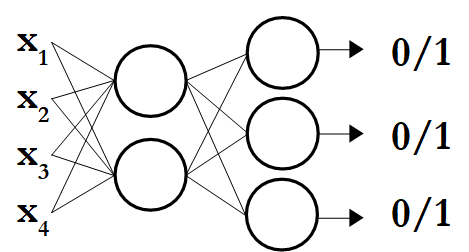

In [2]:
from IPython.display import Image
Image('/home/mainak/HDD_PC/Jupyter_1/DNN/Neural_Network/index1.png')

In [2]:
n_input = 4
n_hidden = 2
n_output = 3

#Define the inputs
inputs = np.array([[4.9, 3.0, 1.4, 0.2],[6.4, 3.2, 4.5, 1.5],
                    [5.8, 2.7, 5.1, 1.9]], dtype=np.float32)

#OHE labels
y = np.array([[1,0,0],[0,1,0],[0,0,1]],dtype=np.int32)

#Define the Weights
np.random.seed(10)
weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden))   # (4, 2)
weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output))  # (2, 3)


In [ ]:
'''Remember the weights should in the format (inputs_shape,hidden_layer_shape)'''


In [17]:
class backprop:

    def __init__(self,inputs,y,weights1,weights2,lr,activation,epochs):
        self.inputs = inputs
        self.y = y
        self.weights1 = weights1
        self.weights2 = weights2
        self.lr = lr
        self.activation = activation
        self.epochs = epochs

    def activations(self,x):
        if self.activation == 'sigmoid':
            return 1/(1 + np.exp(-x))

    def feedforward(self):
        hidden_input = np.dot(self.inputs,self.weights1)
        hidden_output = self.activations(hidden_input)

        final_input = np.dot(hidden_output,self.weights2)
        final_output = self.activations(final_input)
        return final_output,hidden_output

    def back_prop(self):
        # hidden_input = np.dot(self.inputs,self.weights1)
        # hidden_output = self.activations(hidden_input)

        # output_layer = np.dot(hidden_output,self.weights2)
        # final_output = self.activations(output_layer)

        ''' Derivative of a sigmoid is = sigmoid * (1 - sigmoid) '''
        final_output,hidden_output = self.feedforward()
        
        output_layer_error = final_output - self.y
        output_layer_delta = output_layer_error * final_output * (1 - final_output)
        # print(output_layer_error.shape)
        # print(output_layer_delta.shape)


        hidden_layer_error = np.dot(output_layer_delta,self.weights2.T)
        hidden_layer_delta = hidden_layer_error * hidden_output *  (1 - hidden_output)

        #Update Weights
        weight2_update = np.dot(hidden_output.T,output_layer_delta) / self.y.shape[0]
        weight1_update = np.dot(self.inputs.T,hidden_layer_delta) / self.y.shape[0]

        return weight1_update,weight2_update

    def update_weights(self,w1,w2):
        # w1,w2 = self.back_prop()
        self.weights1 = self.weights1 - self.lr * w1
        self.weights2 = self.weights2 - self.lr * w2
        return self.weights1,self.weights2

    def train(self):
        # w1,w2 = self.weights1,self.weights2
        for i in range(self.epochs):
            # print('#'*10 + f'{i}' + '#'*10)
            final_output,hidden_output = self.feedforward()
            w1_,w2_ = self.back_prop()
            self.weights1,self.weights2 = self.update_weights(w1_,w2_)

        return self.weights1,self.weights2

In [25]:
#Loss using the Original weights
bp = backprop(inputs,y,weights_1,weights_2,lr=.001,activation='sigmoid',epochs=200000)
y_hat,hidden_y = bp.feedforward()
loss = ((y_hat - y) ** 2).sum() / y.shape[0]
# print(y_hat.shape)
# print(hidden_y.shape)
loss

0.829867609096949

In [26]:
w1,w2 = bp.train()

In [27]:
#Loss using the optimized weights
y_hat,hidden_y = bp.feedforward()
loss = ((y_hat - y) ** 2).sum() / y.shape[0]
# print(y_hat.shape)
# print(hidden_y,shape)
loss

0.3503619035094647

# Generalized Backpropagation

In [285]:
import numpy as np
# import warnings
# warnings.filterwarnings('ignore')

In [296]:
'''
    input = 3 X 4 , meaning 3 observations each having 4 features
    total_layers = 5 hidden layers along which includes the final o/p layer
'''

#Define the inputs
inputs = np.array([[4.9, 3.0, 1.4, 0.2],[6.4, 3.2, 4.5, 1.5],
                    [5.8, 2.7, 5.1, 1.9]], dtype=np.float32)

#OHE labels
y = np.array([[1,0,0],[0,1,0],[0,0,1]],dtype=np.int32)

#Define the Weights
np.random.seed(10)
weights_0 = np.random.normal(scale=0.5, size=(4,2))   # (4, 2)
weights_1 = np.random.normal(scale=0.5, size=(2,3))  # (2, 3)
weights_2 = np.random.normal(scale=0.5, size=(3,2))
weights_3 = np.random.normal(scale=0.5, size=(2,4))
weights_4 = np.random.normal(scale=0.5, size=(4,3))

weights = [weights_0,weights_1,weights_2,weights_3,weights_4]

#Define bias
b_0 = np.random.randint(low=1,high=10,size=(1,2))
b_1 = np.random.randint(low=1,high=10,size=(1,3))
b_2 = np.random.randint(low=1,high=10,size=(1,2))
b_3 = np.random.randint(low=1,high=10,size=(1,4))
b_4 = np.random.randint(low=1,high=10,size=(1,3))

bias = [b_0,b_1,b_2,b_3,b_4]

In [297]:
class backprop:
    '''Layers = Total number of layers including the final layer'''

    def __init__(self,layers,epochs,inputs,weights,bias,labels,activation,learning_rate):
        self.layers = layers
        self.epochs = epochs
        self.inputs = inputs
        self.weights = weights
        self.bias = bias
        self.y = labels
        self.activation = activation
        self.lr = learning_rate

    def activations(self,x):
        '''Other Activations can be added'''
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-x))

    def grad_activation(self,x):
        return self.activations(x) * (1-self.activations(x))

    def forward_prop(self):
        h = []
        a = []
        inputs = self.inputs
        for i in range(self.layers):
            h_i = np.array(np.dot(inputs,self.weights[i]) + self.bias[i],dtype=np.float32)
            a_i = np.array(self.activations(h_i),dtype=np.float128)
            h.append(h_i)
            a.append(a_i)
            inputs = h_i
        return h,a

    def loss(self,a):
        loss = ((a[-1] - self.y) ** 2 ) / len(self.y)
        return loss.sum()

    def back_prop(self,h,a):
        d_w = [0 for _ in range(self.layers)]
        d_b = [0 for _ in range(self.layers)]
        error_o = (h[-1] - self.y) * self.grad_activation(a[-1])
        for i in reversed(range(self.layers - 1)):
            d_w[i+1] = np.dot(a[i].T,error_o.T) / len(self.y)
            d_b[i+1] = np.sum(error_o,axis=1,keepdims=True) / len(self.y)
            error_i = np.multiply(np.dot(self.weights[i+1],error_o),self.grad_activation(h[i].T))
            error_o = error_i
        # print(error_o.shape)
        # print(self.inputs)
        d_w[0] = np.dot(self.inputs.T,error_o.T)
        d_b[0] = np.sum(error_o,axis=1,keepdims=True) / len(self.y)
        return d_w,d_b

    def update(self,d_w,d_b):
        for i in range(self.layers):
            self.weights[i] = self.weights[i] - self.lr * d_w[i]
            self.bias[i] = self.bias[i] - self.lr * d_b[i].T

        return self.weights,self.bias

    def train(self):
        for j in range(self.epochs):
            # print(f'{j}')
            h,a = self.forward_prop()
            d_w,d_b = self.back_prop(h,a)
            self.weights,self.bias = self.update(d_w,d_b)
        return self.weights,self.bias

In [298]:
bp = backprop(layers=5,epochs=2000,inputs=inputs,weights=weights,bias=bias,labels=y,
                activation='sigmoid',learning_rate=0.1)

In [299]:
#Find the loss for forward pass without backprop
h,a = bp.forward_prop()
loss = bp.loss(a)
loss

1.5544186016133928127

In [300]:
w,b = bp.train()

In [301]:
#Find the loss after training
h,a = bp.forward_prop()
loss = bp.loss(a)
loss

1.3333333333332697996